In [1]:
import pandas as pd
#난방효율성 데이터
df = pd.read_csv("c:/data/energy/ENB2012_data.csv")
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [2]:
train_cols=df.columns[:8]
X=df[train_cols]
X = df[train_cols] # 독립변수
y = df["Y1"] # 난방 하중

<AxesSubplot:>

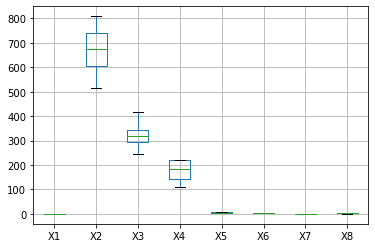

In [3]:
X.boxplot()
# 변수들의 단위가 다름


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


In [5]:
# 변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수 있다
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

<AxesSubplot:>

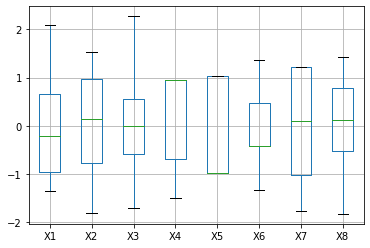

In [6]:
X_train_scaled.boxplot()

In [13]:
# 스케일링되지 않은 데이터
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))


0.9765141471709439
0.9224989102088702


In [14]:
# 스케일링된 데이터
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=2)
model.fit(X_train_scaled,y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled,y_test))

0.9899111840555673
0.9488273149045816


In [15]:
a=model.predict(X_test_scaled)
print(a.flatten()[:10])
b=y_test.values.flatten()
print(b[:10])

[15.29  10.455 36.3   16.695 32.54  28.94  28.47  28.945 28.915 30.615]
[15.18 10.32 37.26 16.95 32.26 27.9  28.18 28.95 29.07 23.8 ]


In [16]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=2)
model.fit(X_train_scaled,y_train)


KNeighborsRegressor(n_neighbors=2)

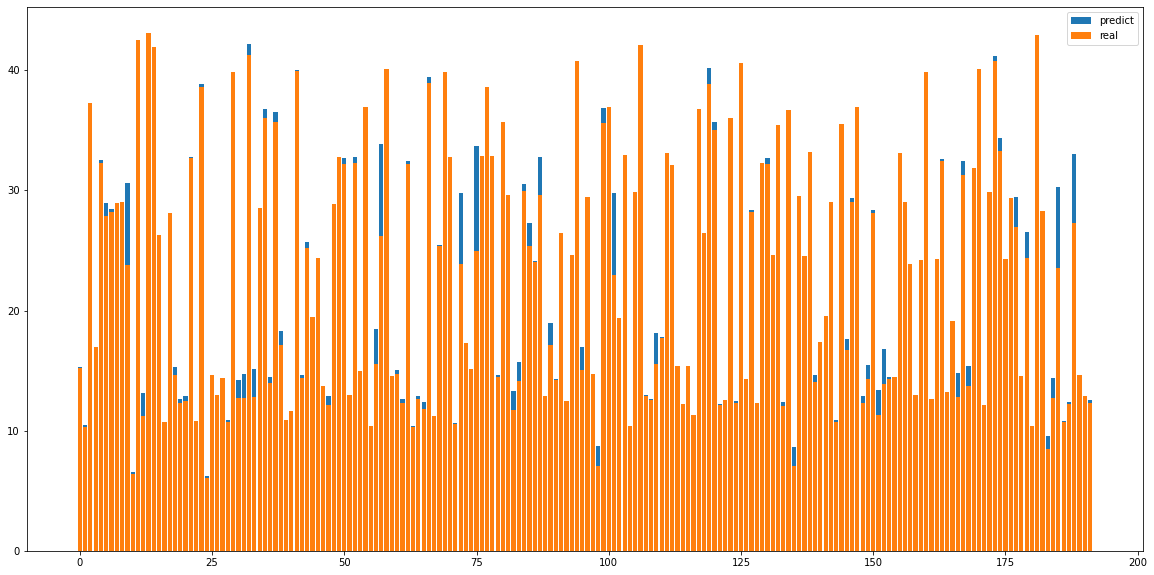

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(range(len(a)), a, label='predict')
plt.bar(range(len(b)), b, label='real')
plt.legend()
plt.show()

In [12]:
#score() 함수의 결과값 - R Square value 
model.score(X_test_scaled,y_test)

0.9488273149045816